# <center> Econometria Financiera <center>
    

<center> Aura Gonzalez 1106920 <center>

    

## Import and Data Loading

In [1]:
import numpy as np
import pandas as pd
import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
sns.set_style("whitegrid")
sns.set()


In [2]:
path = "/Users/Aura/Desktop/dfa_analysis_data.xlsx"
factors_df = pd.read_excel(path, sheet_name='factors (excess return)')[['Mkt-RF','Date']]
factors_df = factors_df.set_index('Date')

portf_df = pd.read_excel(path, sheet_name='portfolios (excess return)')
portf_df = portf_df.set_index('Date')

df_bm = factors_df.join(portf_df)

NameError: name 'pd' is not defined

## 1. La estrategia de DFA

#### 1. La filosofía de inversión de DFA.

#### A) En 100 palabras o menos, describa la creencia de DFA sobre como encontrar prima de riesgo en el mercado.

DFA cree que la prima de riesgo en el mercado se puede encontrar invirtiendo en acciones de valor y acciones de pequeñas empresas, ya que estas acciones tienen un mayor riesgo y, por lo tanto, ofrecen mayores rendimientos a largo plazo. Para minimizar el riesgo de comprar acciones defectuosas, DFA realiza una investigación exhaustiva de las acciones y evita comprar acciones de empresas que han informado ventas por parte de los insiders. Además, DFA presta atención a la naturaleza de los bloques de acciones que negocia y evita comprar acciones poco líquidas. DFA también cree en la diversificación internacional para reducir el riesgo y aprovechar las oportunidades de inversión en todo el mundo.

#### B) ¿En que grado la estrategia de DFA tiene soporte en análisis de equity individuales? ¿Fundamentos macroeconómicos? ¿Eficiencia de Mercado?

La estrategia de DFA tiene un fuerte soporte en la eficiencia de mercado y en la creencia de que no es posible superar consistentemente al mercado a través del análisis de equity individuales. DFA se enfoca en replicar índices amplios y ponderados por valor, en lugar de intentar seleccionar acciones individuales. La estrategia de DFA también se basa en la diversificación y en la creencia de que la diversificación internacional puede reducir el riesgo y aprovechar las oportunidades de inversión en todo el mundo. En cuanto a los fundamentos macroeconómicos, DFA no parece basar su estrategia en ellos, sino más bien en la creencia de que el mercado es eficiente y que los precios de las acciones reflejan toda la información disponible en el mercado.

#### C) ¿Como podemos considerar los fondos que maneja DFA, activos o pasivos?

Podemos considerar los fondos que maneja DFA como pasivos, ya que la estrategia de inversión de DFA se basa en replicar índices amplios y ponderados por valor, en lugar de intentar seleccionar acciones individuales. Los fondos de DFA buscan obtener rendimientos similares a los del mercado en general, en lugar de intentar superar al mercado a través de la selección de acciones individuales. Además, los fondos de DFA tienden a tener tarifas más bajas que los fondos activos, lo que refuerza la idea de que se trata de fondos pasivos. En resumen, los fondos de DFA se pueden considerar como una forma de inversión pasiva que busca replicar el rendimiento del mercado en general.

#### D) ¿A que se refiere DFA con “value” stock y una “growth” stock?

DFA se refiere a "value" stocks como acciones que tienen un precio bajo en relación con su valor contable o su flujo de efectivo, lo que indica que el mercado no está valorando adecuadamente la empresa. Por otro lado, se refiere a "growth" stocks como acciones de empresas que se espera que crezcan a un ritmo más rápido que el promedio del mercado, lo que a menudo se refleja en un precio de la acción más alto en relación con las ganancias actuales de la empresa. En resumen, las acciones de "value" se consideran subvaloradas por el mercado, mientras que las acciones de "growth" se consideran sobrevaloradas en relación con su valor actual. La estrategia de inversión de DFA se centra en la inversión en acciones de "value", ya que se cree que ofrecen mayores rendimientos a largo plazo.

#### 2. Desafíos para la perspectiva de DFA.

#### A) ¿Qué desafíos el modelo de inversión de DFA experimentó en los 1980?

En los años 80, el modelo de inversión de DFA experimentó desafíos debido a que la estrategia de inversión en acciones de pequeñas empresas no estaba bien establecida en ese momento. La mayoría de los fondos de inversión se centraban en acciones de grandes empresas, y los inversores no estaban familiarizados con la inversión en acciones de pequeñas empresas. Además, la inversión en acciones de pequeñas empresas se consideraba arriesgada y volátil, lo que hacía que muchos inversores se sintieran incómodos con esta estrategia. Como resultado, DFA tuvo dificultades para atraer inversores y para obtener rendimientos consistentes en su fondo de inversión en acciones de pequeñas empresas. Sin embargo, DFA perseveró y continuó investigando y refinando su estrategia de inversión en acciones de pequeñas empresas, lo que finalmente llevó a un éxito significativo en las décadas siguientes.

#### B) ¿Qué desafíos el modelo de inversión de DFA experimentó en los 1990?

El modelo de inversión de DFA experimentó desafíos en los años 90 debido a la creciente popularidad de los fondos indexados y la competencia de otros gestores de fondos que también se centraban en la inversión en acciones de pequeñas empresas. Además, la estrategia de inversión de DFA en acciones de pequeñas empresas se volvió más popular y, como resultado, los precios de estas acciones aumentaron, lo que hizo que fuera más difícil encontrar oportunidades de inversión a precios atractivos. DFA también enfrentó desafíos en la gestión de impuestos, ya que la estrategia de inversión en acciones de pequeñas empresas generaba ganancias de capital que podían ser gravadas a tasas más altas. Para abordar estos desafíos, DFA continuó refinando su estrategia de inversión y expandiendo su oferta de fondos para incluir fondos de inversión en acciones de mediana y gran capitalización, así como fondos de inversión en bonos. También se centró en la gestión de impuestos y en la reducción de costos de transacción para mejorar el rendimiento de sus fondos.

## 2. Los Factores

DFA cree que ciertas acciones tienen mayores rendimientos esperados. Además de la prima de mercado DFA, cree que hay una prima de riesgo vinculada a un factor de "size" y "value". Obsérvese que estos tres factores ya están en exceso de retorno. Utilice los datos que se encuentran en `dfa analysis data.xlsx'.

Factores: Datos mensuales de exceso de retorno del mercado global de renta variable (equities), 𝑟𝑟̃𝑚𝑚. La hoja también sobre dos factores adicionales, SMB y HML, así como la tasa libre de riesgo.

#### 1. Calcule las siguientes estadísticas de rendimiento univariado para los factores.
####  • Media
####  • Volatilidad.
####  • Sharpe Ratio.
####  • VaR(.05)

#### Reporte estos estadísticos para las siguientes submuestras:
####  • Inicio muestra – 1980.
####  • 1981 – 2001.
####  • 2002 – Final muestra.

In [5]:
factors_df2 = pd.read_excel(path, sheet_name='factors (excess return)')[['Mkt-RF','SMB','HML','Date']]
factors_df2 = factors_df2.set_index('Date')

# Submuestras
subsample1 = factors_df2.loc[:'12/31/1980']
subsample2 = factors_df2.loc['1/31/1981':'12/31/2001']
subsample3 = factors_df2.loc['1/31/2002':]

In [1]:
# Calcular las estadísticas para cada submuestra
def calcular_estadisticas(data):
    media = data.mean()
    volatilidad = data.std()
    sharpe_ratio = media / volatilidad
    var_05 = np.percentile(data, 5)
    return media, volatilidad, sharpe_ratio, var_05

# Obtener las estadísticas para cada submuestra

stats_subsample1 = calcular_estadisticas(subsample1)
stats_subsample2 = calcular_estadisticas(subsample2)
stats_subsample3 = calcular_estadisticas(subsample3)


# Crear una tabla con los estadísticos para cada submuestra
headers = ["Submuestra", "Media", "Volatilidad", "Sharpe Ratio", "VaR(.05)"]
table = [
    ["Inicio muestra - 1980"] + list(stats_subsample1),
    ["1981 - 2001"] + list(stats_subsample2),
    ["2002 - Final muestra"] + list(stats_subsample3)
]

# Imprimir la tabla
print(tabulate(table, headers, tablefmt="grid"))

NameError: name 'subsample1' is not defined

#### 2. Basado en las estadísticas de los factores más arriba, responda lo siguiente.

***a) ¿Acaso cada factor tiene prima de riesgo (exceso de retorno esperado positivo) en cada submuestra?***
Si debido a que la volatibilidad se muestra en un rango adecuado y el sharpe ratio es relativamente alto ya que mientras mas alto el Sharpe Ratio, más deseable será la inversión, ya que el riesgo se verá compensado con la volatilidad

***b) ¿Acaso la prima de riesgo para el factor size se hace pequeña luego de 1980?***
Si, ha ido disminuyendo


***c) ¿Acaso la prima de riesgo para el factor value se hace pequeña luego de 1980?***
Si, ha ido disminuyendo

***d) ¿Cómo ha sido el rendimiento de los factores después del periodo del caso de estudio, (2002-2021)?***
El rendimiento de los factores despues del periodo de estudio ha disminuido, debido a que el sharpe Ratio es menor, al igual que la media y la volativilidad, es decir, todos los estadisticos indican que hay riesgo de inversion y bajo rendimiento.

#### 3. Los factores son construidos de una manera que la correlación entre ellos es reducida.

Reporte la matriz de correlación a través de los tres factores. ¿Acaso el método de construcción es exitoso en mantener las correlaciones bajas? ¿Acaso esto es logrado en cada una de las tres submuestras?

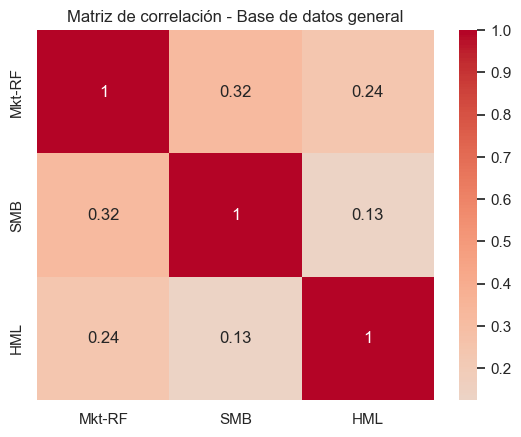

In [7]:
correlation_matrix = factors_df2.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de correlación - Base de datos general')
plt.show()

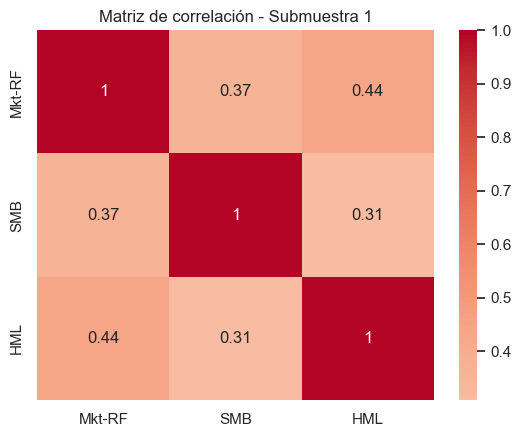

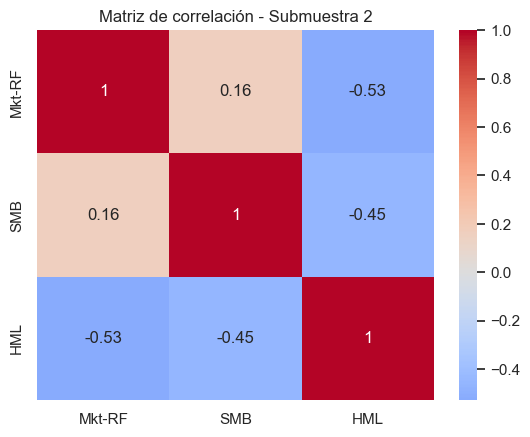

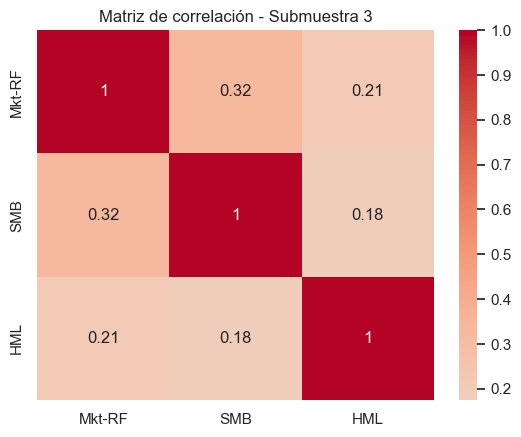

In [8]:
# Matriz de correlación para cada submuestra
correlation_matrix_1 = subsample1.corr()
correlation_matrix_2 = subsample2.corr()
correlation_matrix_3 = subsample3.corr()

# Visualizar las matrices de correlación
sns.heatmap(correlation_matrix_1, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de correlación - Submuestra 1')
plt.show()

sns.heatmap(correlation_matrix_2, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de correlación - Submuestra 2')
plt.show()

sns.heatmap(correlation_matrix_3, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de correlación - Submuestra 3')
plt.show()

#### 4. Grafique los retornos acumulados de los tres factores. Cree los gráficos para la submuestra 1981-2001, así como también para la submuestra del 2002 al 2021.

In [9]:
print(factors_df2.columns)

Index(['Mkt-RF', 'SMB', 'HML'], dtype='object')


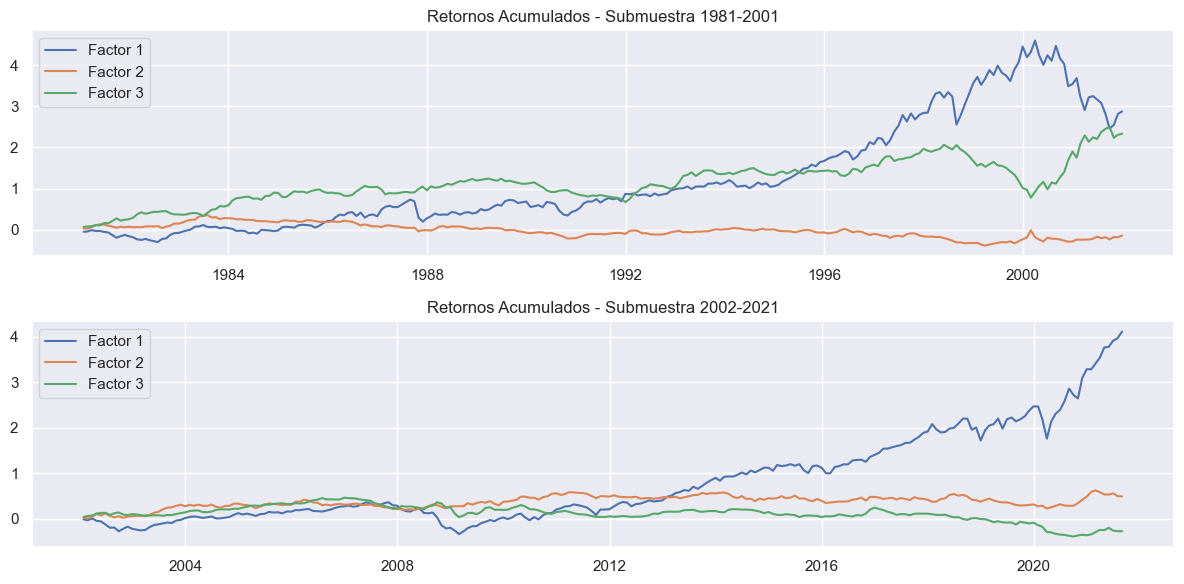

In [10]:
# Calcular los retornos acumulados
returns_cumulative2 = (subsample2 + 1).cumprod() - 1
returns_cumulative3 = (subsample3 + 1).cumprod() - 1

# Graficar los retornos acumulados
plt.figure(figsize=(12, 6))
           
plt.subplot(2, 1, 1)
plt.plot(returns_cumulative2.index, returns_cumulative2['Mkt-RF'], label='Factor 1')
plt.plot(returns_cumulative2.index, returns_cumulative2['SMB'], label='Factor 2')
plt.plot(returns_cumulative2.index, returns_cumulative2['HML'], label='Factor 3')
plt.legend()
plt.title('Retornos Acumulados - Submuestra 1981-2001')

plt.subplot(2, 1, 2)
plt.plot(returns_cumulative3.index, returns_cumulative3['Mkt-RF'], label='Factor 1')
plt.plot(returns_cumulative3.index, returns_cumulative3['SMB'], label='Factor 2')
plt.plot(returns_cumulative3.index, returns_cumulative3['HML'], label='Factor 3')
plt.legend()
plt.title('Retornos Acumulados - Submuestra 2002-2021')

plt.tight_layout()
plt.show()

#### 5. ¿Acaso los tres factores generaron prima en 1981-2001? ¿Y post 2001? ¿Usted le aconsejaría DFA que continue utilizando los tres factores?

Entre 1981-2001 el factor 1 y el factor 3 generaron mayor prima aunque con altibajos, sin embargo, post 2001, el factor 1 mostro generar la mayor prima, Lgenerando una tasa de interés adicional que se produce cuando se invierte en acciones que representan mayor riesgo. Es decir, mientras más riesgo suponga una inversión más alta será la prima a la que el inversor tenga derecho. Por lo que aconsejaria a DFA que continue utilizando el factor 1, debido a que produjo mayores retornos acumulados.

## 3. CAPM

DFA cree que las primas de riesgo en acciones y portafolios de acciones están relacionadas con los tres factores. Probemos los 25 portafolios de acciones que abarcan una amplia gama de medidas de size y value.

• Portafolios: Datos mensuales de exceso de retorno de 25 carteras de renta variable clasificadas por sus características de size-value. Se denominan 𝑟𝑟̃𝑡𝑡, para 𝑛𝑛=1,…,25.
• Note que toda la data es convertida en exceso de retorno.
• Para este problema completo concentrese en la submuestra 1981-Fin de la Muestra,

#### 1. Resumen estadístico. Para cada portafolio,
• Calcule lo estadísticos univariados de 1.1 (anualizados).
• ¿Pude explicarse la diferencia en la media de los excesos de retorno de los portafolios por diferencias en sus volatilidades o de su VaR(.05)?

In [7]:
def performanceMetrics(returns,annualization=1, quantile=.05):
    metrics = pd.DataFrame(index=returns.columns)
    metrics['Mean'] = returns.mean() * annualization
    metrics['Vol'] = returns.std() * np.sqrt(annualization)
    metrics['Sharpe'] = (returns.mean() / returns.std()) * np.sqrt(annualization)

    metrics['Min'] = returns.min()
    metrics['Max'] = returns.max()
    return metrics



In [5]:
bm_portfolios = pd.DataFrame(index=portf_df.columns)
rhs = sm.add_constant(df_bm['Mkt-RF'])
ave_excess_mkt_ret = df_bm['Mkt-RF'].mean()
std_excess_mkt_ret = df_bm['Mkt-RF'].std()
bm_residuals = pd.DataFrame(columns=portf_df.columns)
t_p_values = pd.DataFrame()


In [10]:
Performance = performanceMetrics(portf_df,12)
Performance.style.set_caption('Tabla 1:  Resumen Estadístico de los portafolios (Anualizado)')

,Mean,Vol,Sharpe,Min,Max
SMALL LoBM,0.074748,0.417509,0.179034,-0.495030,1.478101
ME1 BM2,0.089163,0.338509,0.263400,-0.352972,1.260068
ME1 BM3,0.122404,0.318383,0.384456,-0.339091,1.020371
ME1 BM4,0.142367,0.287738,0.494779,-0.350082,1.031555
SMALL HiBM,0.165149,0.321836,0.513147,-0.331329,1.000277
ME2 BM1,0.081536,0.276187,0.295219,-0.332923,0.764562
ME2 BM2,0.115848,0.258933,0.447408,-0.325529,0.780779
ME2 BM3,0.118100,0.250522,0.471418,-0.352938,0.754458
ME2 BM4,0.126147,0.256662,0.491492,-0.304789,0.774707
ME2 BM5,0.150591,0.301639,0.499241,-0.374177,0.899424


#### 2. CAPM

a) Para cada uno de los n=25 portafolios de prueba, realice la regresión CAPM de serie de tiempo vista en clase. Usted estará realizando 25 regresiones separadas, cada una usando muestras de tamaño T de la data de serie de tiempo.

b) Reporte las estimaciones de 𝛽𝛽𝑖𝑖,𝑚𝑚, los Treynor Ratios, 𝛼𝛼𝑖𝑖, y los Information Ratio.

In [9]:

# Loop para calcular 25 regresiones
for portf in bm_portfolios.index:
    lhs = df_bm[portf]
    res = sm.OLS(lhs, rhs, missing='drop').fit()
    bm_portfolios.loc[portf, 'alpha_hat'] = res.params['const']
    bm_portfolios.loc[portf, 'beta_hat'] = res.params['Mkt-RF']
    bm_portfolios.loc[portf, 'r_squared'] = res.rsquared
    bm_portfolios.loc[portf, 'CAPM_implied_excess_ret'] = ave_excess_mkt_ret * bm_portfolios.loc[portf, 'beta_hat']
    bm_portfolios.loc[portf, 'ave_excess_ret'] = df_bm[portf].mean()
    bm_portfolios.loc[portf, 'std_excess_ret'] = df_bm[portf].std()
    bm_residuals[portf] = res.resid
    
    t_p_values.loc[portf, 't-value'] = res.params['const']
    t_p_values.loc[portf, 't-value'] = res.tvalues['const']
    t_p_values.loc[portf, 'p-value'] = round(res.pvalues['const'], 4)
    
bm_portfolios['sharpe_ratio'] = np.sqrt(12) * bm_portfolios['ave_excess_ret'] / bm_portfolios['std_excess_ret']
bm_portfolios['treynor_ratio'] = 12 * bm_portfolios['ave_excess_ret'] / bm_portfolios['beta_hat']
bm_portfolios['portfolio'] = bm_portfolios.index.values #str.split('portfolio').str[1].astype(int)
bm_portfolios['portfolio_num'] = np.arange(1,len(bm_portfolios.index.values)+1) #str.split('portfolio').str[1].astype(int)

In [10]:
bm_portfolios

,alpha_hat,beta_hat,r_squared,CAPM_implied_excess_ret,ave_excess_ret,std_excess_ret,sharpe_ratio,treynor_ratio,portfolio,portfolio_num
SMALL LoBM,-0.004958,1.615735,0.512232,0.011187,0.006229,0.120524,0.179034,0.046263,SMALL LoBM,1
ME1 BM2,-0.002282,1.402764,0.587336,0.009713,0.007430,0.097719,0.263400,0.063562,ME1 BM2,2
ME1 BM3,0.000503,1.400522,0.661815,0.009697,0.010200,0.091909,0.384456,0.087399,ME1 BM3,3
ME1 BM4,0.003085,1.267869,0.664065,0.008779,0.011864,0.083063,0.494779,0.112288,ME1 BM4,4
SMALL HiBM,0.004254,1.373303,0.622759,0.009509,0.013762,0.092906,0.513147,0.120257,SMALL HiBM,5
ME2 BM1,-0.001996,1.269632,0.722783,0.008791,0.006795,0.079728,0.295219,0.064220,ME2 BM1,6
ME2 BM2,0.001162,1.226527,0.767430,0.008492,0.009654,0.074747,0.447408,0.094452,ME2 BM2,7
ME2 BM3,0.001536,1.199566,0.784179,0.008306,0.009842,0.072319,0.471418,0.098453,ME2 BM3,8
ME2 BM4,0.002118,1.212323,0.763081,0.008394,0.010512,0.074092,0.491492,0.104054,ME2 BM4,9
ME2 BM5,0.002957,1.385418,0.721514,0.009593,0.012549,0.087076,0.499241,0.108697,ME2 BM5,10


c) Si el CAPM es verdad, ¿Que sería cierto sobre los Treynor Ratios, alphas, e Information Ratios?

#### 3. Estimación Cross-Sectional (Corte Transversal)

a) Reporte el R-cuadrado de esta regresión.
b) Reporte el intercepto, 𝜂𝜂.
c) Reporte el coeficiente de la regresión, 𝜆𝜆𝑚𝑚.

In [11]:
bm_portfolios.columns
res = smf.ols(formula="ave_excess_ret ~ beta_hat", data=bm_portfolios).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         ave_excess_ret   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     3.570
Date:                Tue, 13 Jun 2023   Prob (F-statistic):             0.0715
Time:                        22:13:59   Log-Likelihood:                 122.16
No. Observations:                  25   AIC:                            -240.3
Df Residuals:                      23   BIC:                            -237.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0036      0.003      1.230      0.231      -0.002       0.010
beta_hat       0.0045      0.002      1.889      0.072      -0.000       0.009
==============================================================================
Omnibus:                        1.387   Durbin-Watson:                   1.337
Prob(Omnibus):                  0.500   Jarque-Bera (JB):                0.451
Skew:                          -0.274   Prob(JB):                        0.798
Kurtosis:                       3.363   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
# (a)
res.rsquared

0.13436017015879909

In [14]:
# (b)
alpha_

0.003612096452960887

In [16]:
# (c)
lambda_M = res.params['beta_hat']
alpha_ = res.params['Intercept']

print('Lambda = {:.2f}%'.format(lambda_M*100))
print('Media muestra = {:.2f}%'.format(12 * df_bm['Mkt-RF'].mean()*100))
print('Diferencia Promedio de Precio de la Prima de Riesgo = intercepto = {:.2f}%'.format(alpha_*12*100))

Lambda = 0.45%
Media muestra = 8.31%
Diferencia Promedio de Precio de la Prima de Riesgo = intercepto = 4.33%


#### 4. En términos generales, ¿apoyan estos resultados la creencia de DFA de que los portafolios de size y value contienen prima de riesgo no relacionada al CAPM?

DFA cree que la prima de riesgo en el mercado se puede encontrar invirtiendo en acciones de valor y acciones de pequeñas empresas, ya que estas acciones tienen un mayor riesgo y, por lo tanto, ofrecen mayores rendimientos a largo plazo. Por lo que se puede decir que esta relacionado al CAPM.
